## Building Boolean network models

We're going to build a simple simulation framework for representing the Boolean network model shown below, and then we'll explore how different starting conditions and different updating rules (synchronous vs. asynchronous) affect the dynamics of the system.

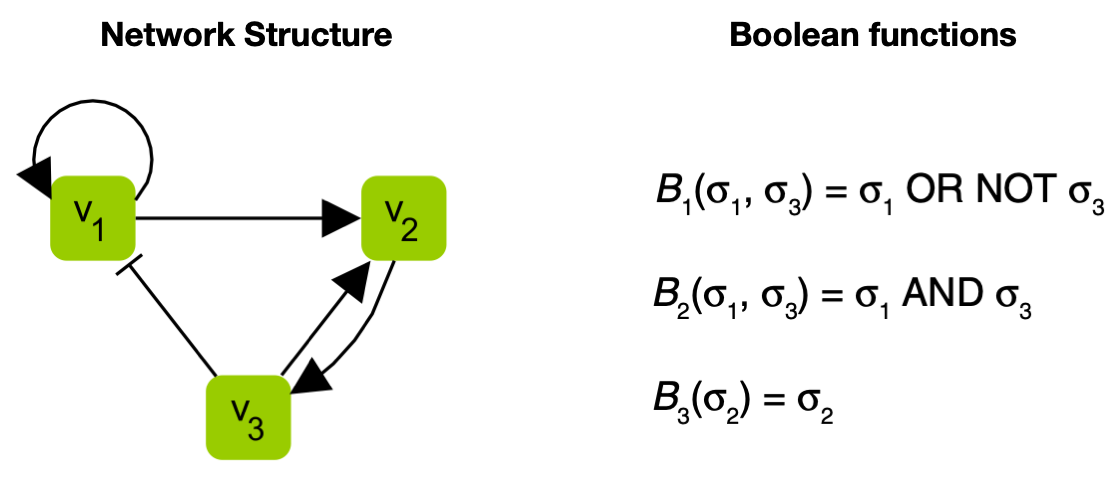

In [8]:
import numpy as np
from matplotlib import pyplot as plt

## Define the logic functions

In [20]:
# logic fxns

def B1(v1, v3):
    return v1 or (not v3)

def B2(v1, v3):
    return v1 and v3

def B3(v2):
    return v2


## Core of the simulation

Having defined the Boolean updating functions for the network, we'll use lists to track the state of each node (variable) in the network and write a for-loop to implement the updating of the system state over time. 

Notice that the network topology (the edges between the nodes) is implicit in terms of the arguments to the Boolean updating functions, so to faithfully represent the network we need to make sure we're calling each function with the rigth inputs.

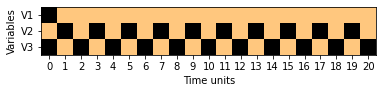

In [26]:
# This is a "synchronous model" because each node gets updated 
# at every "tick" of the simulation clock, and the new state of each node at
# time t_n depends only on the state of the network in the previous time step (t_{n-1})

# We're going to track the state of each variable in the model with lists
# The first element in each list represents the initial state of the system
V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    # get the current state of the variables
    v1now = V1[-1]
    v2now = V2[-1]
    v3now = V3[-1]
    
    # find updates
    v1new = B1(v1now, v3now)
    v2new = B2(v1now, v3now)
    v3new = B3(v2now)
    
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
# combine the individual lists representing each variable
# into an array to make plotting simpler
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

### Draw the state transition graph for this simulation

See board.

### Changing the starting conditions

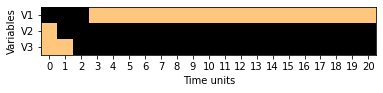

In [28]:
# synchronous model, different starting conditions
V1 = [False]
V2 = [True]
V3 = [True]

nsteps = 20

for i in range(nsteps):
    # get the current state of the variables
    v1now = V1[-1]
    v2now = V2[-1]
    v3now = V3[-1]
    
    # find updates
    v1new = B1(v1now, v3now)
    v2new = B2(v1now, v3now)
    v3new = B3(v2now)
    
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

### Draw the state transition graph for this simulation

See board.

## Asynchronous updating

Another way to run Boolean simulations is to use asynchronous updating of the nodes.  Asynchronous updating is useful for represent phenomena such stochasticity in  network interactions, or network interactions that operate on different time scales.

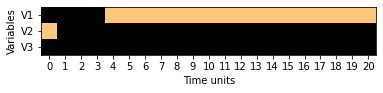

In [33]:
# Asynchronous updating, random node chosen to update

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    
    # by default keep everything the same
    v1new, v2new, v3new = v1now, v2now, v3now
    
    # randomly pick a node to update
    toupdate = random.choice([1,2,3])
    if toupdate == 1:
        v1new = B1(v1now, v3now)
    elif toupdate == 2:
        v2new = B2(v1now, v3now)
    else:
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass


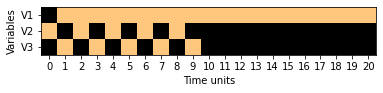

In [34]:
# Asynchronous updating, random probability of each node updating

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    v1new, v2new, v3new = v1now, v2now, v3now

    # probability of updating is relatively high, so on average
    # like synchronous network, but with some element of stochasticity
    if random.random() < 0.95:
        v1new = B1(v1now, v3now)
    if random.random() < 0.95:
        v2new = B2(v1now, v3now)
    if random.random() < 0.95:
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

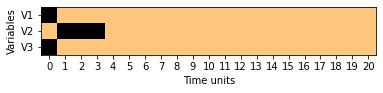

In [36]:
## Asynchronous updating, deterministic, time scale varies

V1 = [False]
V2 = [True]
V3 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]
    v1new, v2new, v3new = v1now, v2now, v3now
                    
                     # update v1 every 1 steps
    if i % 1 == 0:   # % is the modulo operator in python, look it up if you don't understand it!
        v1new = B1(v1now, v3now)
        
    if i % 3 == 0:   # update v2 every 3 steps
        v2new = B2(v1now, v3now)
        
    if i % 5 == 0:   # update v3 every 5 steps
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass

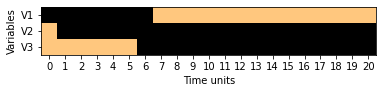

In [37]:
## Asynchronous updating, deterministic, time scale varies
## different starting conditions

V1 = [False]
V2 = [True]
V3 = [True]

nsteps = 20

for i in range(nsteps):
    # take a snapshot
    v1now, v2now, v3now = V1[-1], V2[-1], V3[-1]

    # find updates
    v1new, v2new, v3new = v1now, v2now, v3now
                    
                     # update v1 every 1 steps
    if i % 1 == 0:   # % is the modulo operator in python, look it up if you don't understand it!
        v1new = B1(v1now, v3now)
        
    if i % 3 == 0:   # update v2 every 3 steps
        v2new = B2(v1now, v3now)
        
    if i % 5 == 0:   # update v3 every 5 steps
        v3new = B3(v2now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    
    
V123 = np.array([V1,V2,V3])

plt.imshow(V123, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(3), ['V1','V2','V3'])

pass